In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
train_data = pd.read_csv("../dataset/lucence_train.csv")
test_data = pd.read_csv("../dataset/lucence_test.csv")

train_data

,F72,F25,F65,F68,F101,F104,F105,F15-NA,F15-private,F15-protected,...,F71-markrmiller@apache.org,F71-noble@apache.org,F71-yonik@apache.org,F71-mikemccand@apache.org,F71-shaie@apache.org,F71-rjernst@apache.org,F71-romseygeek@apache.org,F71-erick@apache.org,F71-uschindler@apache.org,label
0,0.035424,0.023909,0.325926,0.111765,0.314867,0.029159,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0
1,0.035424,0.023909,0.325926,0.111765,0.064721,0.029159,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0
2,0.747947,0.511462,0.170370,0.505882,0.448043,0.105411,0.565774,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1
3,0.747947,0.511462,0.170370,0.505882,0.448043,0.105411,0.565774,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1
4,0.326937,0.225290,0.014815,0.111765,0.486329,0.053511,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,0.812837,0.594281,0.325926,0.045098,0.626310,0.046278,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3255,0.812837,0.594281,0.325926,0.045098,0.528170,0.046278,0.621172,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1
3256,0.812837,0.594281,0.325926,0.045098,0.615383,0.046278,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1
3257,0.812837,0.594281,0.325926,0.045098,0.623578,0.046278,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1


In [3]:
feature_columns = ['F72', 'F25', 'F65', 'F68', 'F101', 'F104', 'F105', 'F15-NA',
       'F15-private', 'F15-protected', 'F15-public', 'F22', 'F123', 'F77',
       'F41', 'F126']

X_train = train_data[feature_columns]
y_train = train_data['label']

X_test = test_data[feature_columns]
y_test = test_data['label']

In [4]:
# Logistic Regression Model

logistic_model = LogisticRegression()

# Define hyperparameters to tune
param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}

# GridSearchCV for hyperparameter tuning
grid_search_logistic = GridSearchCV(logistic_model, param_grid, cv=5, scoring='f1')

# Fit the model
grid_search_logistic.fit(X_train, y_train)

# Best parameters
print("Best parameters for Logistic Regression: ", grid_search_logistic.best_params_)


Best parameters for Logistic Regression:  {'C': 10, 'solver': 'lbfgs'}


In [5]:
# Predict on the test data
y_pred_logistic = grid_search_logistic.predict(X_test)
y_proba_logistic = grid_search_logistic.predict_proba(X_test)[:, 1]

# Evaluation Metrics for Logistic Regression
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Precision:", precision_score(y_test, y_pred_logistic))
print("Recall:", recall_score(y_test, y_pred_logistic))
print("F1 Score:", f1_score(y_test, y_pred_logistic))
print("AUC Score:", roc_auc_score(y_test, y_proba_logistic))

Logistic Regression Metrics:
Accuracy: 0.6957664233576643
Precision: 0.5846774193548387
Recall: 0.3724315068493151
F1 Score: 0.45502092050209203
AUC Score: 0.6417746766528487


In [6]:
# Support Vector Machine Model

svm_model = SVC(probability=True)

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='f1')

grid_search_svm.fit(X_train, y_train)

print("Best parameters for SVM:", grid_search_svm.best_params_)

Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}


In [7]:
y_pred_svm = grid_search_svm.predict(X_test)
y_proba_svm = grid_search_svm.predict_proba(X_test)[:, 1]

print("SVM Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("AUC Score:", roc_auc_score(y_test, y_proba_svm))

SVM Metrics:
Accuracy: 0.785985401459854
Precision: 0.7959183673469388
Recall: 0.5008561643835616
F1 Score: 0.6148187073042565
AUC Score: 0.8023331901967091


In [8]:
# Random Forest Model

rf_model = RandomForestClassifier()

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='f1')

grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)

Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [9]:
y_pred_rf = grid_search_rf.predict(X_test)
y_proba_rf = grid_search_rf.predict_proba(X_test)[:, 1]

print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("AUC Score:", roc_auc_score(y_test, y_proba_rf))


Random Forest Metrics:
Accuracy: 0.8703649635036497
Precision: 0.9123006833712984
Recall: 0.6857876712328768
F1 Score: 0.782991202346041
AUC Score: 0.9385731453438617


In [10]:
# Compare the models
models = ['Logistic Regression', 'SVM', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_logistic),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_rf)
]
precisions = [
    precision_score(y_test, y_pred_logistic),
    precision_score(y_test, y_pred_svm),
    precision_score(y_test, y_pred_rf)
]
recalls = [
    recall_score(y_test, y_pred_logistic),
    recall_score(y_test, y_pred_svm),
    recall_score(y_test, y_pred_rf)
]
f1_scores = [
    f1_score(y_test, y_pred_logistic),
    f1_score(y_test, y_pred_svm),
    f1_score(y_test, y_pred_rf)
]
auc_scores = [
    roc_auc_score(y_test, y_proba_logistic),
    roc_auc_score(y_test, y_proba_svm),
    roc_auc_score(y_test, y_proba_rf)
]

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores,
    'AUC Score': auc_scores
})

results_df


,Model,Accuracy,Precision,Recall,F1 Score,AUC Score
0,Logistic Regression,0.695766,0.584677,0.372432,0.455021,0.641775
1,SVM,0.785985,0.795918,0.500856,0.614819,0.802333
2,Random Forest,0.870365,0.912301,0.685788,0.782991,0.938573


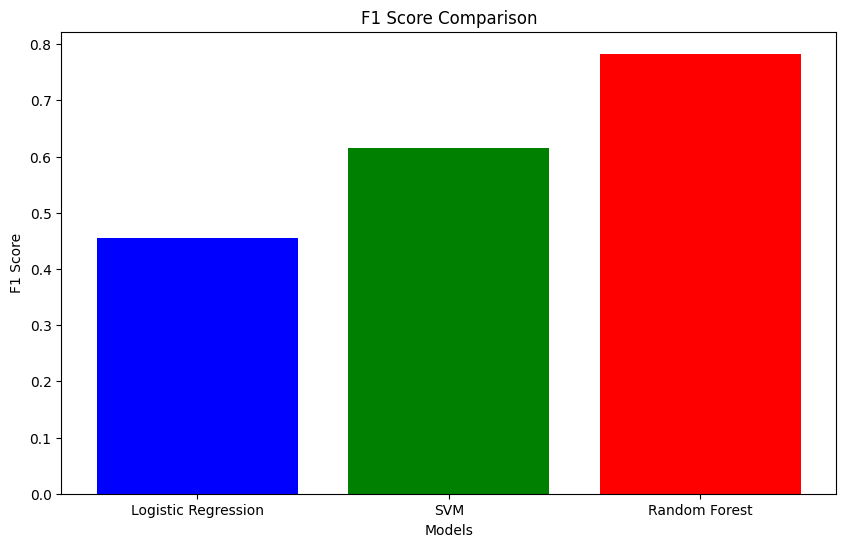

In [11]:
# Plotting the F1 Score comparison
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color=['blue', 'green', 'red'])
plt.title('F1 Score Comparison')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.show()

In [12]:
from sklearn.ensemble import VotingClassifier

base_models = [
    ('logistic', grid_search_logistic.best_estimator_),
    ('svm', grid_search_svm.best_estimator_),
    ('rf', grid_search_rf.best_estimator_)
]

# Hard Voting Classifier (majority voting)
hard_voting_clf = VotingClassifier(estimators=base_models, voting='hard')
hard_voting_clf.fit(X_train, y_train)

# Predict using hard voting (class predictions)
y_pred_hard_voting = hard_voting_clf.predict(X_test)

# Metrics for Hard Voting 
print("Hard Voting Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_hard_voting))
print("Precision:", precision_score(y_test, y_pred_hard_voting))
print("Recall:", recall_score(y_test, y_pred_hard_voting))
print("F1 Score:", f1_score(y_test, y_pred_hard_voting))
print("AUC Score: Not available for hard voting\n")

# Soft Voting Classifier (average probabilities)
soft_voting_clf = VotingClassifier(estimators=base_models, voting='soft')
soft_voting_clf.fit(X_train, y_train)

# Predict and evaluate soft voting (probabilities are available)
y_pred_soft_voting = soft_voting_clf.predict(X_test)
y_proba_soft_voting = soft_voting_clf.predict_proba(X_test)[:, 1]

print("Soft Voting Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_soft_voting))
print("Precision:", precision_score(y_test, y_pred_soft_voting))
print("Recall:", recall_score(y_test, y_pred_soft_voting))
print("F1 Score:", f1_score(y_test, y_pred_soft_voting))
print("AUC Score:", roc_auc_score(y_test, y_proba_soft_voting))


Hard Voting Classifier Metrics:
Accuracy: 0.8046715328467153
Precision: 0.8707280832095097
Recall: 0.5017123287671232
F1 Score: 0.6366105377512221
AUC Score: Not available for hard voting

Soft Voting Classifier Metrics:
Accuracy: 0.8204379562043795
Precision: 0.8671978751660027
Recall: 0.5590753424657534
F1 Score: 0.6798542425819886
AUC Score: 0.862011110032107
